
# Loading Packages and Data



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing

%matplotlib inline 

In [2]:
data = pd.read_csv("/content/Train.csv")

# Data Structure and Content

In [5]:
data.shape

(8523, 12)

In [6]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis(EDA)

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
data['Item_Weight'].mean()

12.857645184135976

In [12]:
data['Item_Weight'] = data['Item_Weight'].fillna(12.857)

In [13]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

In [15]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
sum(data.duplicated()) == 0

True

In [17]:
def handle_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    col[col < lower] = lower
    col[col > upper] = upper
    return col

<Axes: >

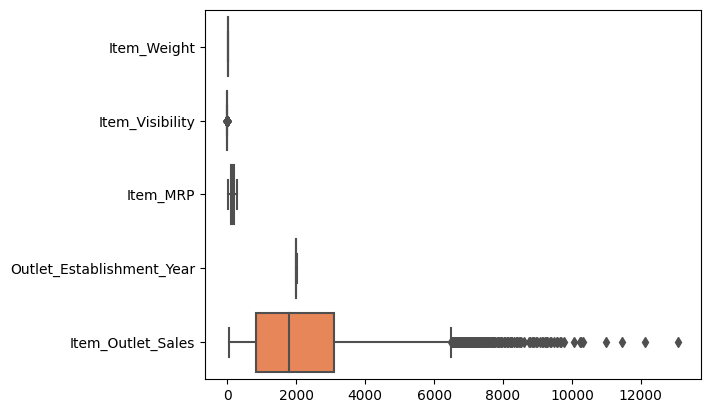

In [18]:
sns.boxplot(data=data,palette='rainbow',orient='h')

In [19]:
handle_outlier(data['Item_Outlet_Sales'])

<ipython-input-17-42b41d2257cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col < lower] = lower
<ipython-input-17-42b41d2257cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col > upper] = upper


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

<Axes: >

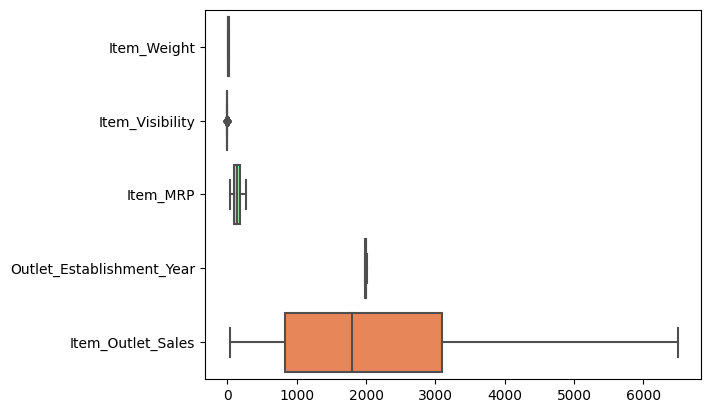

In [20]:
sns.boxplot(data=data,palette='rainbow',orient='h')

(array([ 682.,    0.,  445.,    0.,  425.,    0., 1232.,    0.,  910.,
           0.,  648.,    0., 1200.,    0.,  856.,    0.,    0.,  110.,
           0.,  520.,    0.,  214.,    0.,  649.,    0.,  251.,    0.,
         148.,    0.,  169.,    0.,   64.]),
 array([ 0.     ,  0.46875,  0.9375 ,  1.40625,  1.875  ,  2.34375,
         2.8125 ,  3.28125,  3.75   ,  4.21875,  4.6875 ,  5.15625,
         5.625  ,  6.09375,  6.5625 ,  7.03125,  7.5    ,  7.96875,
         8.4375 ,  8.90625,  9.375  ,  9.84375, 10.3125 , 10.78125,
        11.25   , 11.71875, 12.1875 , 12.65625, 13.125  , 13.59375,
        14.0625 , 14.53125, 15.     ]),
 <BarContainer object of 32 artists>)

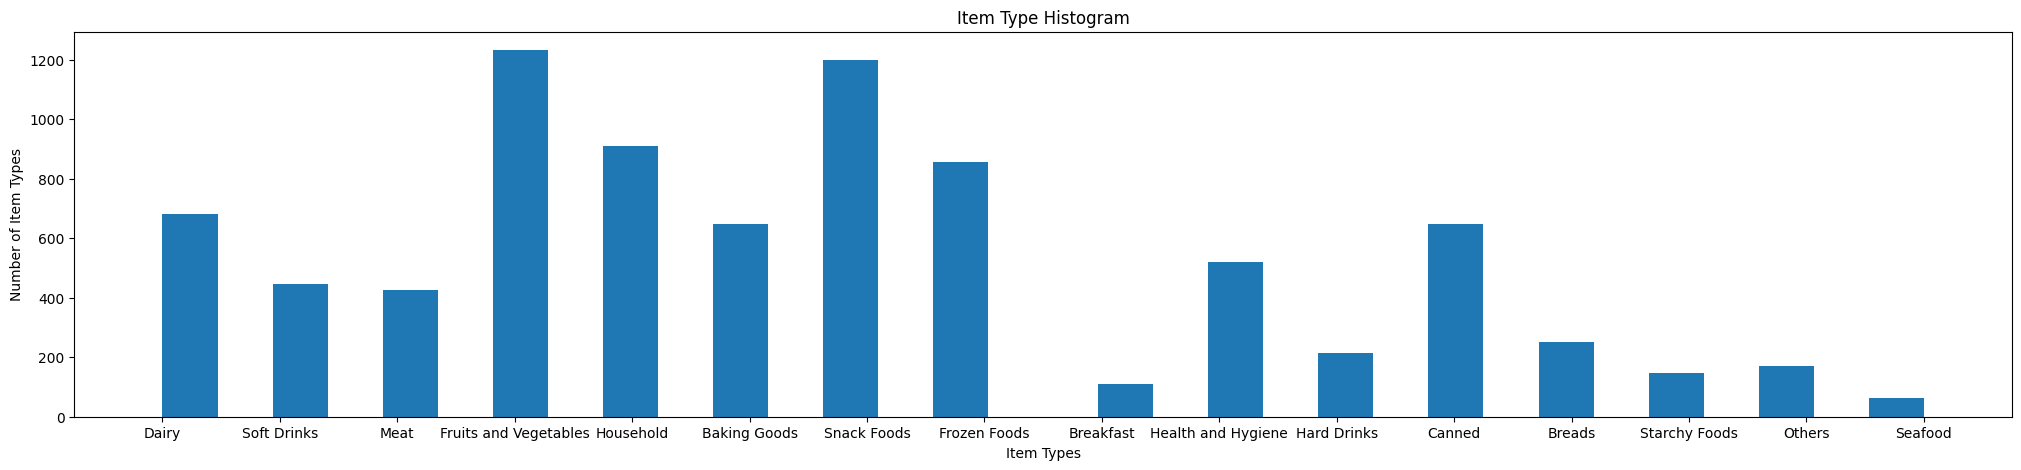

In [21]:
plt.figure(figsize=(25,5))
plt.title("Item Type Histogram")
plt.xlabel("Item Types")
plt.ylabel("Number of Item Types")
plt.hist(data['Item_Type'], bins=32)

(array([5089.,    0., 2889.,    0.,    0.,  112.,    0.,  316.,    0.,
         117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

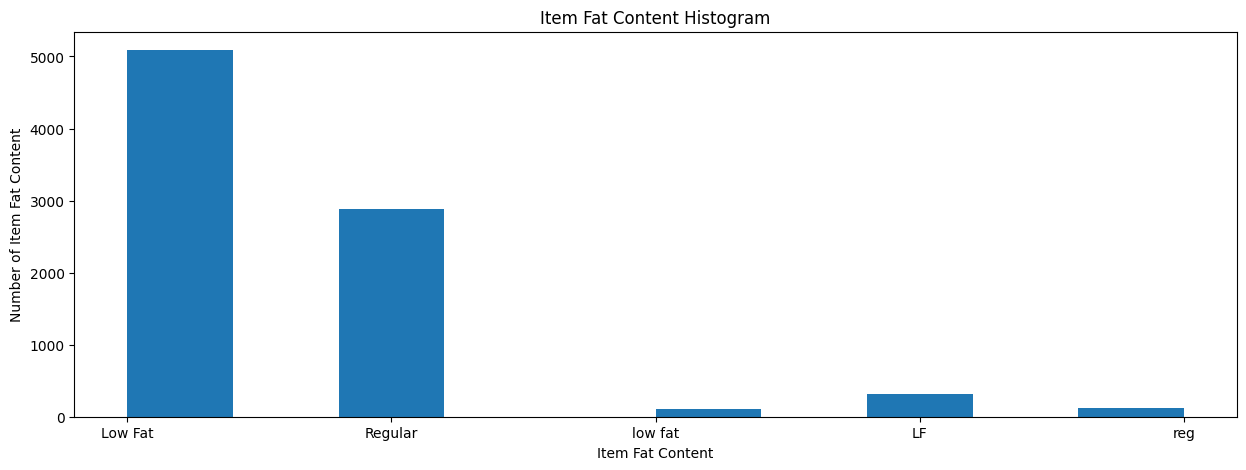

In [22]:

plt.figure(figsize=(15,5))
plt.title("Item Fat Content Histogram")
plt.xlabel("Item Fat Content")
plt.ylabel("Number of Item Fat Content")
plt.hist(data['Item_Fat_Content'], bins=10)


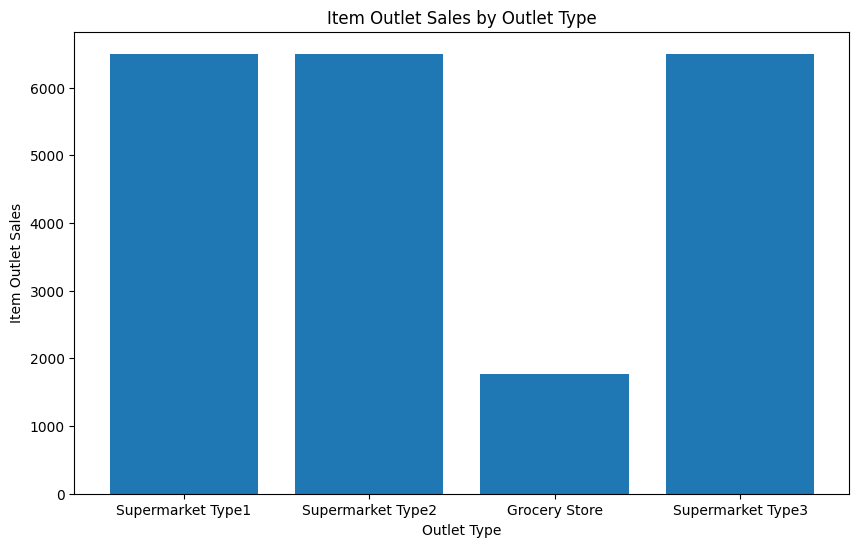

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(data['Outlet_Type'], data['Item_Outlet_Sales'])
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Item Outlet Sales')
ax.set_title('Item Outlet Sales by Outlet Type')
plt.show()

In [24]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [25]:
label_encoder = preprocessing.LabelEncoder()
data['Item_Identifier']= label_encoder.fit_transform(data['Item_Identifier'])
data['Item_Identifier'].unique()

array([ 156,    8,  662, ..., 1323, 1524, 1519])

In [26]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
label_encoder = preprocessing.LabelEncoder()
data['Item_Fat_Content']= label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Fat_Content'].unique()

array([1, 2, 3, 0, 4])

In [28]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
label_encoder = preprocessing.LabelEncoder()
data['Item_Type']= label_encoder.fit_transform(data['Item_Type'])
data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [30]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [31]:
data['Outlet_Identifier']= label_encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Identifier'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [32]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [33]:
data['Outlet_Size']= label_encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Size'].unique()

array([1, 0, 2])

In [34]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [35]:
data['Outlet_Location_Type']= label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [36]:
data['Outlet_Type'].unique()
  

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [37]:
data['Outlet_Type']= label_encoder.fit_transform(data['Outlet_Type'])
data['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [39]:
# Define the fixed number to subtract
fixed_number = 2013

# Subtract the fixed number from the Outlet_Establishment_Year column
data['Outlet_Establishment_Year'] =   fixed_number - data['Outlet_Establishment_Year']
data['Outlet_Establishment_Year'] .head(10)

0    14
1     4
2    14
3    15
4    26
5     4
6    26
7    28
8    11
9     6
Name: Outlet_Establishment_Year, dtype: int64

In [40]:
correlation = data.corr()
correlation. style. background_gradient (cmap = 'YlGnBu')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044517,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,0.012772,0.001389,0.003656,-0.001178,0.003056
Item_Weight,0.044517,1.000000,-0.017330,-0.012054,0.028015,0.024757,-0.007974,0.008261,-0.007233,0.004082,-0.000590,0.012366
Item_Fat_Content,-0.098114,-0.017330,1.000000,0.034042,-0.115958,-0.000876,-0.002357,0.000189,-0.012058,-0.004102,-0.004214,0.009839
Item_Visibility,-0.025482,-0.012054,0.034042,1.000000,-0.035249,-0.001315,-0.100439,0.074834,0.069309,-0.028099,-0.173468,-0.131600
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,-0.004970,-0.001859,0.003084,0.003053,0.017388
Item_MRP,0.012853,0.024757,-0.000876,-0.001315,0.032651,1.000000,0.003319,-0.005020,0.006059,0.000232,-0.001975,0.574554
Outlet_Identifier,-0.008602,-0.007974,-0.002357,-0.100439,0.001656,0.003319,1.000000,-0.079035,0.504603,-0.716176,0.099873,0.169321
Outlet_Establishment_Year,0.012772,0.008261,0.000189,0.074834,-0.004970,-0.005020,-0.079035,1.000000,-0.193389,0.089216,0.122304,0.037133
Outlet_Size,0.001389,-0.007233,-0.012058,0.069309,-0.001859,0.006059,0.504603,-0.193389,1.000000,-0.614311,-0.201483,-0.087251
Outlet_Location_Type,0.003656,0.004082,-0.004102,-0.028099,0.003084,0.000232,-0.716176,0.089216,-0.614311,1.000000,0.467219,0.083727


In [41]:
data.drop(['Item_Identifier'],axis=1,inplace = True)

In [42]:
data.drop(['Outlet_Identifier'],axis=1,inplace = True)

In [43]:
data.drop(['Item_Weight'],axis=1,inplace = True)

In [44]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.3)

# Models

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print('Accuracy:', accuracy)



Accuracy: 0.521778816914465


In [47]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.521731610763383


In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5833361315887644


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(max_depth=3, learning_rate=0.1, n_estimators=100)
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.6187361379327998


In [50]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Create a DMatrix object for the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)

# Set the hyperparameters for the model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict the target variable for new data
dtest = xgb.DMatrix(x_test)
predictions = model.predict(dtest)

# Calculate the R-squared score of the model on the testing data
r2 = r2_score(y_test, predictions)

print('R-squared score:', r2)

R-squared score: 0.6198907287323745


# Test

In [83]:
datatest = pd.read_csv("/content/Test.csv")

In [84]:
datatest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [85]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [86]:
datatest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [87]:
datatest.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [88]:
datatest['Item_Weight'].mean()

12.695633368756642

In [89]:
datatest['Item_Weight'] = datatest['Item_Weight'].fillna(12.695)

In [90]:
datatest['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [91]:
datatest['Outlet_Size'] = datatest['Outlet_Size'].fillna('Medium')

In [92]:
datatest.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [93]:
sum(datatest.duplicated()) == 0

True

<Axes: >

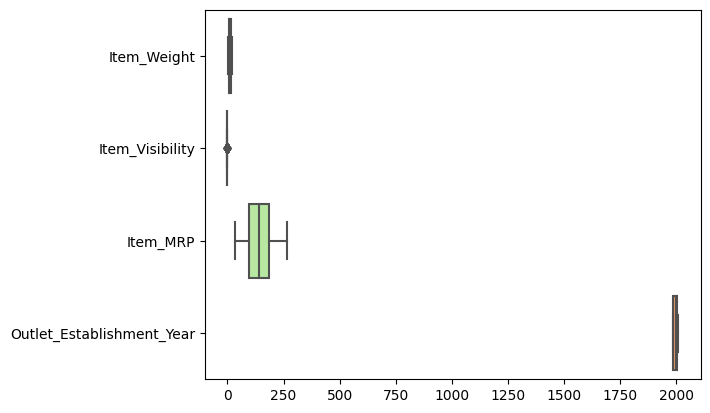

In [94]:
sns.boxplot(data=datatest,palette='rainbow',orient='h')

In [95]:
datatest['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [96]:
label_encoder = preprocessing.LabelEncoder()
datatest['Item_Identifier']= label_encoder.fit_transform(datatest['Item_Identifier'])
datatest['Item_Identifier'].unique()

array([1103, 1067, 1406, ..., 1332,  745,  356])

In [97]:
datatest['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [98]:
label_encoder = preprocessing.LabelEncoder()
datatest['Item_Fat_Content']= label_encoder.fit_transform(datatest['Item_Fat_Content'])
datatest['Item_Fat_Content'].unique()

array([1, 4, 2, 0, 3])

In [99]:
datatest['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [100]:
label_encoder = preprocessing.LabelEncoder()
datatest['Item_Type']= label_encoder.fit_transform(datatest['Item_Type'])
datatest['Item_Type'].unique()

array([13,  4, 11,  6,  0,  8,  1,  7, 12, 14,  9,  5, 10,  3, 15,  2])

In [101]:
datatest['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [102]:
label_encoder = preprocessing.LabelEncoder()
datatest['Outlet_Identifier']= label_encoder.fit_transform(datatest['Outlet_Identifier'])
datatest['Outlet_Identifier'].unique()

array([9, 2, 0, 5, 8, 3, 7, 4, 1, 6])

In [103]:
datatest['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [108]:
label_encoder = preprocessing.LabelEncoder()
datatest['Outlet_Size']= label_encoder.fit_transform(datatest['Outlet_Size'])
datatest['Outlet_Size'].unique()

array([1, 2, 0])

In [104]:
label_encoder = preprocessing.LabelEncoder()
datatest['Outlet_Location_Type']= label_encoder.fit_transform(datatest['Outlet_Location_Type'])
datatest['Outlet_Location_Type'].unique()

array([0, 1, 2])

In [105]:
datatest['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [106]:
label_encoder = preprocessing.LabelEncoder()
datatest['Outlet_Type']= label_encoder.fit_transform(datatest['Outlet_Type'])
datatest['Outlet_Type'].unique()

array([1, 0, 3, 2])

In [110]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 488.3 KB


In [114]:
# Define the fixed number to subtract
fixed_number = 2013

# Subtract the fixed number from the Outlet_Establishment_Year column
datatest['Outlet_Establishment_Year'] =   fixed_number - datatest['Outlet_Establishment_Year']


In [115]:
datatest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,14,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,6,1,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,15,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,6,1,1,1
4,1184,12.695,2,0.118599,4,234.2300,5,28,1,2,3


In [116]:
datatest.drop(['Item_Identifier'],axis=1,inplace = True)

In [118]:
datatest.drop(['Outlet_Identifier'],axis=1,inplace = True)

In [119]:
datatest.drop(['Item_Weight'],axis=1,inplace = True)

In [120]:
Xtest = datatest

# prediction

In [ ]:

# Make predictions on the new dataset
predictions = model.predict(Xtest)

# Add the predictions to the new dataset
new_data['predictions'] = predictions

# Save the new dataset with predictions
new_data.to_csv('new_data_with_predictions.csv', index=False)

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(max_depth=3, learning_rate=0.1, n_estimators=100)
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
predictions = model.predict(Xtest)
print('Accuracy:', accuracy)
datatest['predictions'] = predictions



Accuracy: 0.6190030202163369


In [122]:
datatest['predictions'].head()

0    1741.939093
1    1374.106305
2     626.930367
3    2577.676395
4    4975.475722
Name: predictions, dtype: float64

In [123]:
datatest.head(10)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,predictions
0,1,0.007565,13,107.8622,14,1,0,1,1741.939093
1,4,0.038428,4,87.3198,6,1,1,1,1374.106305
2,1,0.099575,11,241.7538,15,1,2,0,626.930367
3,1,0.015388,13,155.0340,6,1,1,1,2577.676395
4,2,0.118599,4,234.2300,28,1,2,3,4975.475722
5,2,0.063817,6,117.1492,16,2,0,1,1832.779091
6,2,0.082602,0,50.1034,4,1,2,2,629.439208
7,1,0.015782,0,81.0592,28,1,2,3,2118.848085
8,2,0.123365,13,95.7436,11,1,1,1,1513.964467
9,1,0.005698,0,186.8924,6,1,1,1,3232.375852
